In [1]:
#Imports
import re
import unicodedata
import pandas as pd
import nltk

# Visual 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from env import get_connection

import acquire as a
import prepare as p

## Spam Data

### Load the spam data set.

In [2]:
# Connection to SQL
url = get_connection('spam_db')

# Query
query = '''
        SELECT *
        FROM spam
        '''

In [3]:
#Read SQL
df = pd.read_sql(query, url, index_col='id')
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Ci..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 t...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [8]:
#Define function to clean up text data
def clean_text(text, extra_stopwords=['r', 'u', '2', 'ltgt']):
    
    wnl = nltk.stem.WordNetLemmatizer()
    
    stopwords = nltk.corpus.stopwords.words('english') + extra_stopwords
    
    clean_text = (unicodedata.normalize('NFKD', text)
                   .encode('ascii', 'ignore')
                   .decode('utf-8', 'ignore')
                   .lower())
    
    words = re.sub(r'[^\w\s]', '', clean_text).split()
    
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [9]:
#Clean the text data by label
ham = clean_text(' '.join(df[df['label'] == 'ham']['text']))
spam = clean_text(' '.join(df[df['label'] == 'spam']['text']))
all_them_words = clean_text(' '.join(df['text']))

In [10]:
ham

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'oni',
 'dun',
 'say',
 'early',
 'hor',
 'c',
 'already',
 'say',
 'nah',
 'dont',
 'think',
 'go',
 'usf',
 'life',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'caller',
 'press',
 '9',
 'copy',
 'friend',
 'callertune',
 'im',
 'gonna',
 'home',
 'soon',
 'dont',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'ive',
 'cried',
 'enough',
 'today',
 'ive',
 'searching',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'time',
 'date',
 'sunday',
 'oh',
 'kim',
 'watching',
 'eh',
 'remember',
 'spell',
 'name',
 'yes',
 'v',
 'naught

### Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?


In [35]:
bigrams = nltk.ngrams(ham, 2)
ham_list = list(bigrams)
ham_list

[('go', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', 'ok'),
 ('ok', 'lar'),
 ('lar', 'joking'),
 ('joking', 'wif'),
 ('wif', 'oni'),
 ('oni', 'dun'),
 ('dun', 'say'),
 ('say', 'early'),
 ('early', 'hor'),
 ('hor', 'c'),
 ('c', 'already'),
 ('already', 'say'),
 ('say', 'nah'),
 ('nah', 'dont'),
 ('dont', 'think'),
 ('think', 'go'),
 ('go', 'usf'),
 ('usf', 'life'),
 ('life', 'around'),
 ('around', 'though'),
 ('though', 'even'),
 ('even', 'brother'),
 ('brother', 'like'),
 ('like', 'speak'),
 ('speak', 'treat'),
 ('treat', 'like'),
 ('like', 'aid'),
 ('aid', 'patent'),
 ('patent', 'per'),
 ('per', 'request'),
 ('request', 'melle'),
 ('melle', 'melle'),
 ('melle', 'oru'),
 ('oru', 'minnaminunginte'),
 ('minnaminunginte', 'nurungu'),
 ('nurung

In [36]:
' '.join(ham_list)

TypeError: sequence item 0: expected str instance, tuple found

In [45]:
ham_bigrams = pd.Series(nltk.ngrams(ham,2))
ham_counts = ham_bigrams.value_counts().head(30)
ham_counts

(call, later)        52
(ill, call)          48
(let, know)          42
(sorry, ill)         39
(dont, know)         32
(good, morning)      31
(new, year)          30
(take, care)         26
(im, going)          24
(ok, lor)            22
(pls, send)          22
(im, gonna)          20
(good, night)        19
(happy, new)         19
(wat, time)          18
(last, night)        18
(hi, hi)             18
(great, day)         17
(dont, want)         15
(want, go)           15
(nice, day)          15
(send, message)      15
(dont, think)        14
(hope, good)         14
(4, dinner)          14
(pick, phone)        13
(want, come)         13
(im, home)           13
(cant, pick)         13
(good, afternoon)    13
dtype: int64

In [46]:
spam_bigrams = pd.Series(nltk.ngrams(spam,2))
spam_counts = spam_bigrams.value_counts().head(30)
spam_counts

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(send, stop)            19
(selected, receive)     19
(await, collection)     19
(every, week)           19
(chance, win)           19
(urgent, mobile)        18
(land, line)            18
(valid, 12hrs)          17
(claim, call)           17
(sae, tc)               16
(account, statement)    16
(call, 08000930705)     16
(prize, claim)          16
(ur, mob)               15
(call, mobileupd8)      15
(call, customer)        15
(dating, service)       15
(free, entry)           15
(trying, contact)       15
(draw, show)            15
(identifier, code)      15
(reply, call)           15
(free, text)            14
(2nd, attempt)          14
dtype: int64

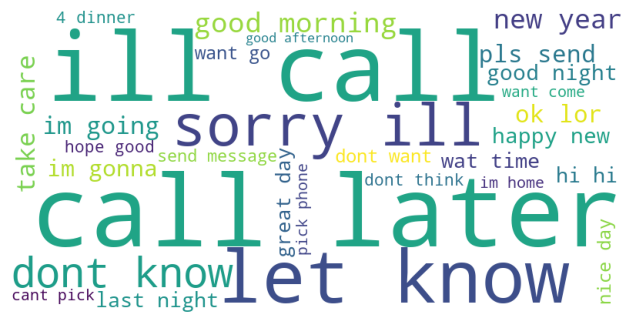

In [49]:
# Ham Wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in ham_counts.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


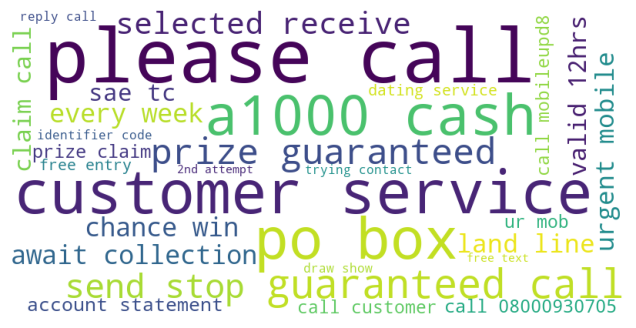

In [57]:
# Spam Wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in spam_counts.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

### Is there any overlap in the bigrams for the spam data and the ham data?


Call is common in both bigrams, but is paired with a different word. Other than that, it is hard to tell.

### Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [58]:
ham_trigrams = pd.Series(nltk.ngrams(ham,3))
ham_counts_tri = ham_trigrams.value_counts().head(20)
ham_counts_tri

(ill, call, later)          42
(sorry, ill, call)          38
(happy, new, year)          19
(pls, send, message)        13
(cant, pick, phone)         12
(right, pls, send)          12
(phone, right, pls)         12
(pick, phone, right)        12
(hi, hi, hi)                11
(x, x, x)                    8
(good, morning, dear)        7
(call, later, meeting)       6
(convey, birthday, wish)     6
(pls, convey, birthday)      6
(kiss, across, sea)          6
(lunch, lunch, invited)      5
(man, last, week)            5
(story, man, last)           5
(sad, story, man)            5
(love, go, day)              5
dtype: int64

In [59]:
spam_trigrams = pd.Series(nltk.ngrams(spam,3))
spam_counts_tri = spam_trigrams.value_counts().head(20)
spam_counts_tri

(prize, guaranteed, call)              21
(call, customer, service)              15
(land, line, claim)                    14
(reply, call, 08000930705)             14
(private, 2003, account)               13
(2003, account, statement)             13
(camcorder, reply, call)               12
(guaranteed, a1000, cash)              12
(show, 800, unredeemed)                12
(urgent, trying, contact)              11
(tone, 4, ur)                          11
(anytime, network, min)                11
(please, call, customer)               11
(every, week, txt)                     11
(bonus, caller, prize)                 11
(speak, live, operator)                10
(customer, service, representative)    10
(a2000, bonus, caller)                 10
(cash, await, collection)              10
(mob, every, week)                      9
dtype: int64

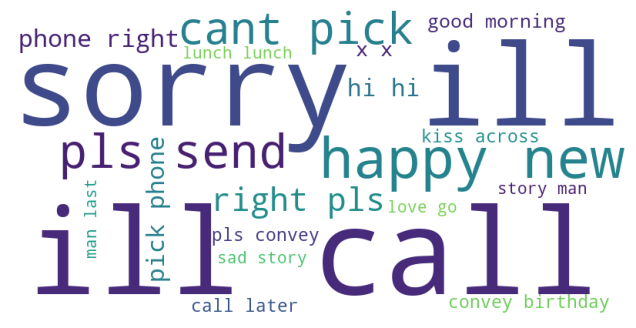

In [60]:
# Ham Wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in ham_counts_tri.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()


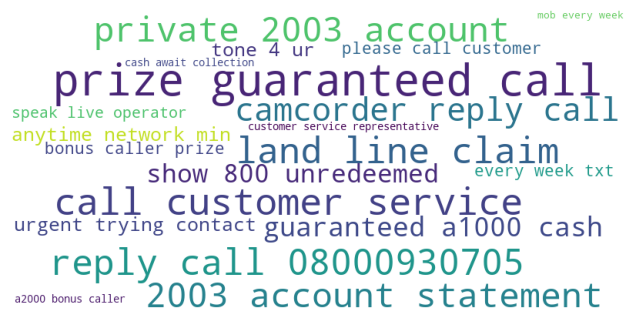

In [132]:
# Spam Wordcloud
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in spam_counts_tri.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

## Explore the blog articles using the techniques discussed in the exploration lesson.

In [66]:
blog_df = a.get_blog_articles_json()
blog_df = pd.DataFrame(blog_df)
blog_df.head(3)

,title,link,date_published,content
0,Black Excellence in Tech: Panelist Spotlight – Wilmarie De La Cruz Mejia,https://codeup.com/codeup-news/panelist-spotlight-4/,"Feb 16, 2023",\nBlack excellence in tech: Panelist Spotlight – Wilmarie De La Cruz Mejia\n\nCodeup i...
1,Black excellence in tech: Panelist Spotlight – Stephanie Jones,https://codeup.com/events/black-excellence-in-tech-panelist-spotlight-stephanie-jones/,"Feb 13, 2023",\nBlack excellence in tech: Panelist Spotlight – Stephanie Jones\nCodeup is hosting ou...
2,Black excellence in tech: Panelist Spotlight – James Cooper,https://codeup.com/events/black-excellence-in-tech-panelist-spotlight-james-cooper/,"Feb 10, 2023",\nBlack excellence in tech: Panelist Spotlight – James Cooper\nCodeup is hosting our s...


In [89]:
# Clean Content column
content = clean_text(' '.join(blog_df['content']))
content[:10]

['black',
 'excellence',
 'tech',
 'panelist',
 'spotlight',
 'wilmarie',
 'de',
 'la',
 'cruz',
 'mejia']

In [91]:
content_bigrams = pd.Series(nltk.ngrams(content,2))
content_counts = content_bigrams.value_counts().head(30)
content_counts

(black, excellence)           9
(coding, bootcamps)           9
(excellence, tech)            9
(course, report)              5
(tech, industry)              5
(tech, panel)                 5
(experience, black)           4
(panelist, leading)           4
(leading, discussion)         4
(discussion, learn)           4
(learn, bit)                  4
(bit, respective)             4
(respective, experience)      4
(leader, tech)                4
(black, leader)               4
(like, spotlight)             4
(industry, meet)              4
(experience, codeup)          4
(february, 22nd)              4
(sit, insightful)             4
(insightful, conversation)    4
(spotlight, panelist)         4
(22nd, sit)                   4
(wed, like)                   4
(black, history)              4
(celebrate, wed)              4
(tech, panelist)              4
(codeup, hosting)             4
(panel, honor)                4
(honor, black)                4
dtype: int64

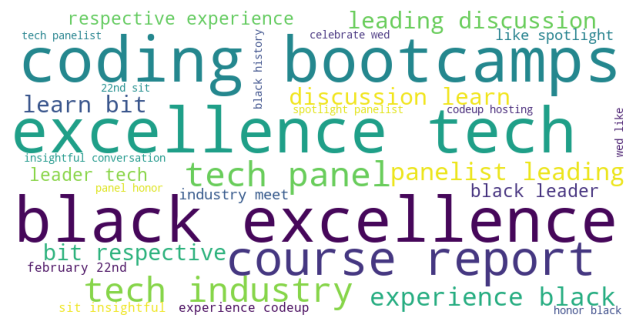

In [92]:
# Spam Wordcloud
data = {k[0] + ' ' + k[1]: v for k, v in content_counts.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [93]:
# Content Trigram
content_trigrams = pd.Series(nltk.ngrams(content,3))
content_counts_tri = content_trigrams.value_counts().head(30)
content_counts_tri

(black, excellence, tech)          9
(excellence, tech, panel)          5
(2023, celebrate, wed)             4
(wed, like, spotlight)             4
(like, spotlight, panelist)        4
(spotlight, panelist, leading)     4
(panelist, leading, discussion)    4
(leading, discussion, learn)       4
(discussion, learn, bit)           4
(learn, bit, respective)           4
(bit, respective, experience)      4
(experience, black, leader)        4
(black, leader, tech)              4
(leader, tech, industry)           4
(tech, industry, meet)             4
(sit, insightful, conversation)    4
(22nd, sit, insightful)            4
(february, 22nd, sit)              4
(excellence, tech, panelist)       4
(celebrate, wed, like)             4
(respective, experience, black)    4
(22, 2023, celebrate)              4
(honor, black, history)            4
(february, 22, 2023)               4
(tech, panel, honor)               4
(panel, honor, black)              4
(tech, panelist, spotlight)        4
(

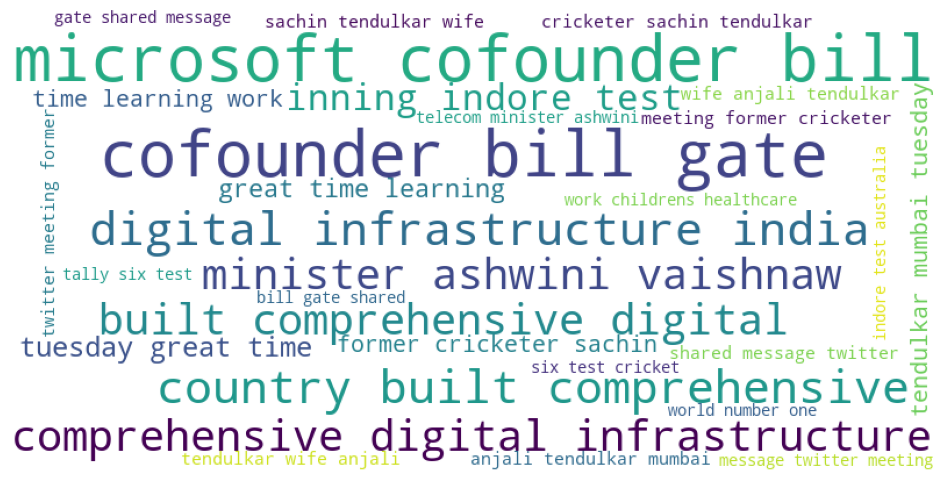

In [133]:
# Spam Wordcloud Trigram
data = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in content_counts_tri.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

In [102]:
content_counts[:10]

(black, excellence)      9
(coding, bootcamps)      9
(excellence, tech)       9
(course, report)         5
(tech, industry)         5
(tech, panel)            5
(experience, black)      4
(panelist, leading)      4
(leading, discussion)    4
(discussion, learn)      4
dtype: int64

In [104]:
content_counts_tri[:10]

(black, excellence, tech)          9
(excellence, tech, panel)          5
(2023, celebrate, wed)             4
(wed, like, spotlight)             4
(like, spotlight, panelist)        4
(spotlight, panelist, leading)     4
(panelist, leading, discussion)    4
(leading, discussion, learn)       4
(discussion, learn, bit)           4
(learn, bit, respective)           4
dtype: int64

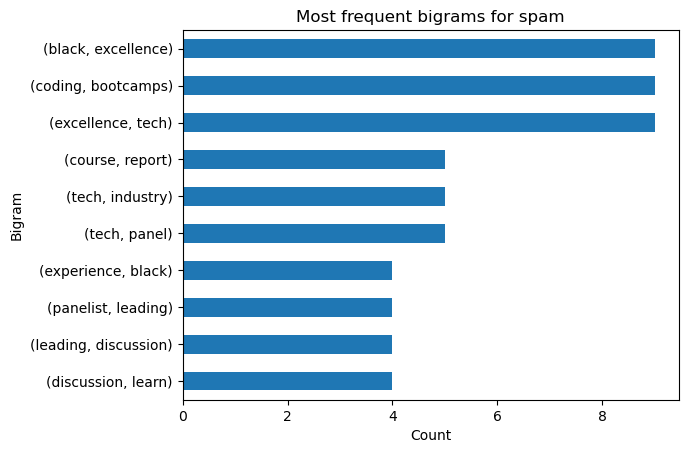

In [103]:
#Plot Bigrams
content_counts[:10].plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most frequent bigrams for spam')
plt.show()

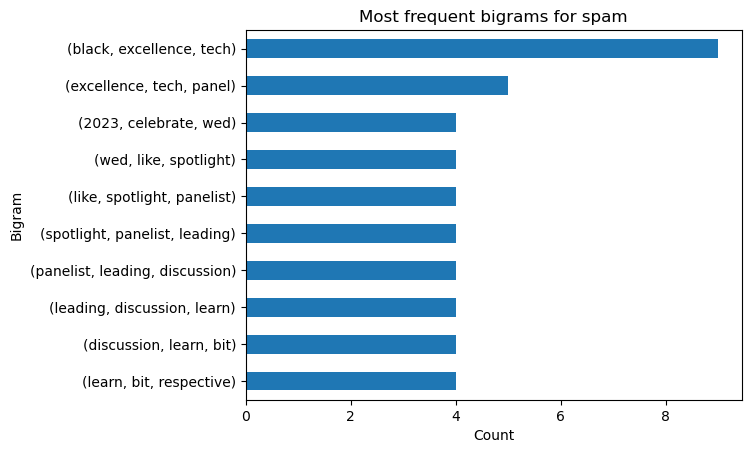

In [105]:
#Plot Trigrams
content_counts_tri[:10].plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most frequent bigrams for spam')
plt.show()

## Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.

In [107]:
categories = ['business','technology','entertainment','sports']
news_df = a.get_news_articles(categories)
news_df = pd.DataFrame(news_df)
news_df.head(3)

,category,title,content
0,business,All Adani stocks end higher for the first time since Hindenburg report,"All 10 Adani Group stocks closed higher on Wednesday, the first such occurrence since ..."
1,business,Smriti Irani's 2011 tweet on LPG price hike resurfaces after rise in LPG cylinder prices,Hours after the central government raised the price of commercial LPG cylinders by ₹35...
2,business,"Indian-Americans Renjen, Subramaniam to be members of US Export Council",Indian-Americans Punit Renjen and Rajesh Subramaniam will be members of US President J...


In [108]:
# Clean Content column
news_content = clean_text(' '.join(news_df['content']))
news_content[:10]

['10',
 'adani',
 'group',
 'stock',
 'closed',
 'higher',
 'wednesday',
 'first',
 'occurrence',
 'since']

In [109]:
content_bigrams = pd.Series(nltk.ngrams(news_content,2))
content_counts = content_bigrams.value_counts().head(30)
content_counts

(bill, gate)                 11
(cofounder, bill)             9
(microsoft, cofounder)        9
(digital, infrastructure)     8
(first, inning)               7
(gate, said)                  5
(six, test)                   5
(last, year)                  5
(third, test)                 5
(india, covid19)              4
(number, one)                 4
(social, medium)              4
(test, australia)             4
(world, number)               4
(premji, said)                4
(team, india)                 4
(kapil, sharma)               4
(indore, test)                4
(test, india)                 4
(health, initiative)          4
(ashwini, vaishnaw)           4
(gate, added)                 4
(comprehensive, digital)      4
(minister, ashwini)           4
(built, comprehensive)        4
(country, built)              4
(axis, bank)                  4
(said, india)                 4
(infrastructure, india)       4
(great, time)                 3
dtype: int64

In [116]:
content_trigrams = pd.Series(nltk.ngrams(news_content,3))
content_counts_tri = content_trigrams.value_counts().head(30)
content_counts_tri

(microsoft, cofounder, bill)                9
(cofounder, bill, gate)                     9
(digital, infrastructure, india)            4
(country, built, comprehensive)             4
(comprehensive, digital, infrastructure)    4
(built, comprehensive, digital)             4
(minister, ashwini, vaishnaw)               4
(inning, indore, test)                      3
(tuesday, great, time)                      3
(great, time, learning)                     3
(former, cricketer, sachin)                 3
(time, learning, work)                      3
(tendulkar, mumbai, tuesday)                3
(anjali, tendulkar, mumbai)                 3
(wife, anjali, tendulkar)                   3
(tendulkar, wife, anjali)                   3
(sachin, tendulkar, wife)                   3
(cricketer, sachin, tendulkar)              3
(shared, message, twitter)                  3
(meeting, former, cricketer)                3
(twitter, meeting, former)                  3
(message, twitter, meeting)       

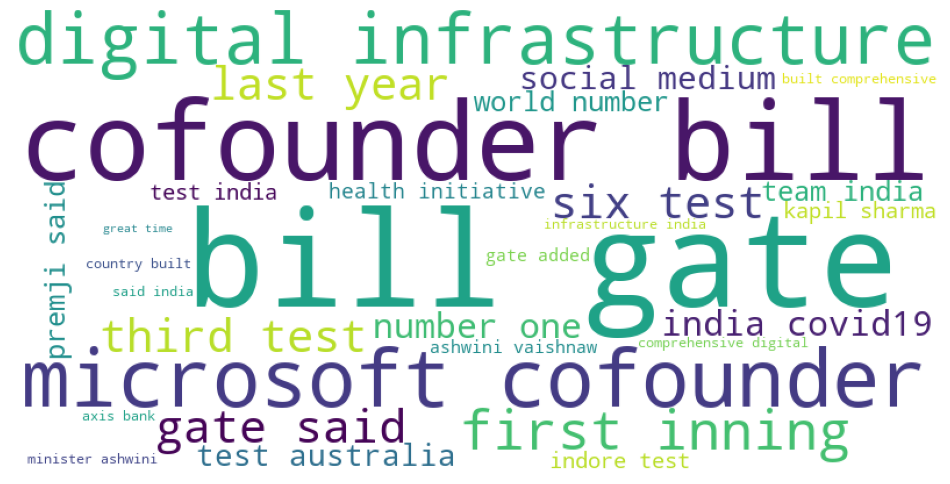

In [117]:
# Spam Wordcloud bigram
data = {k[0] + ' ' + k[1]: v for k, v in content_counts.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

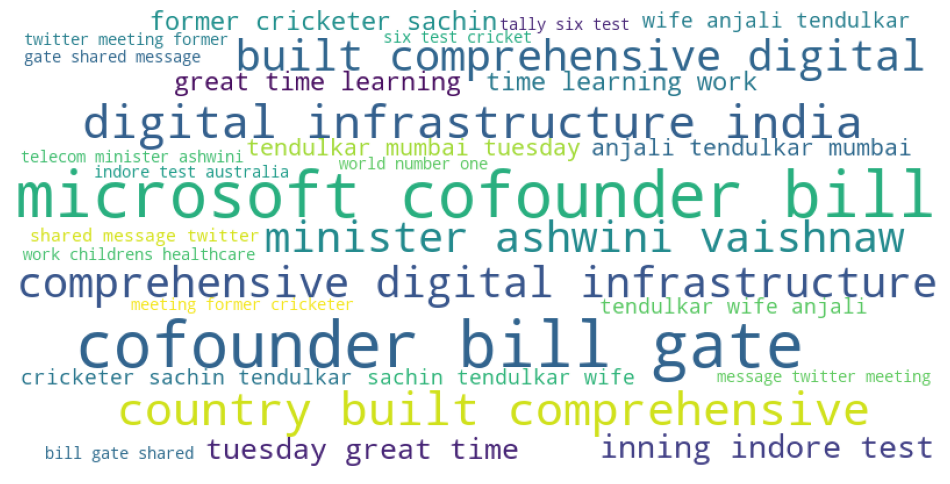

In [134]:
# Spam Wordcloud Trigram
data = {k[0] + ' ' + k[1]+ ' ' + k[2]: v for k, v in content_counts_tri.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

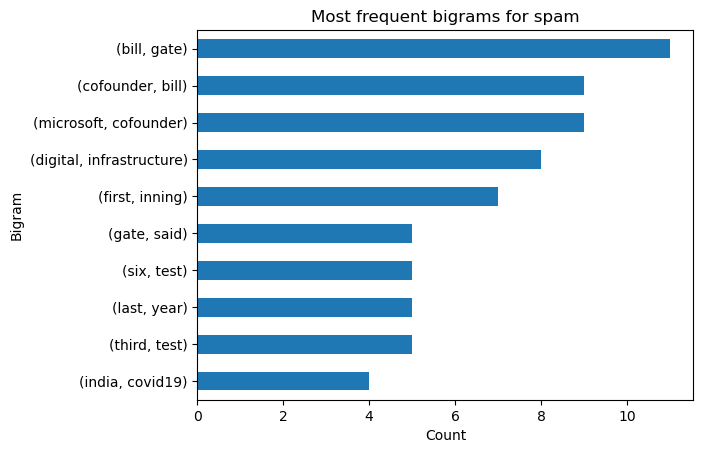

In [119]:
#Plot Bigrams
content_counts[:10].plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most frequent bigrams for spam')
plt.show()

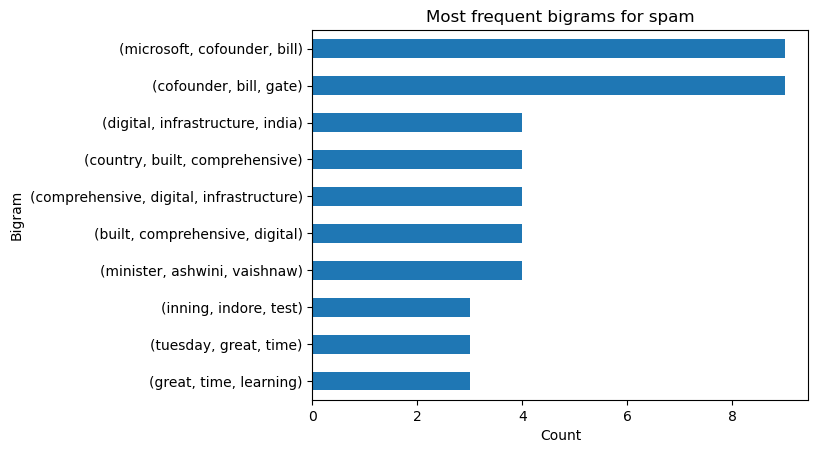

In [120]:
#Plot Trigrams
content_counts_tri[:10].plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most frequent bigrams for spam')
plt.show()

In [121]:
news_df.head()

,category,title,content
0,business,All Adani stocks end higher for the first time since Hindenburg report,"All 10 Adani Group stocks closed higher on Wednesday, the first such occurrence since ..."
1,business,Smriti Irani's 2011 tweet on LPG price hike resurfaces after rise in LPG cylinder prices,Hours after the central government raised the price of commercial LPG cylinders by ₹35...
2,business,"Indian-Americans Renjen, Subramaniam to be members of US Export Council",Indian-Americans Punit Renjen and Rajesh Subramaniam will be members of US President J...
3,business,Adani secures $3 bn credit from a sovereign wealth fund: Report,Adani Group has reportedly told creditors it has secured a $3 billion loan from a sove...
4,business,We can score a century for progress: Gates on meeting Tendulkar,Microsoft Co-founder Bill Gates shared a message on Twitter after meeting former crick...


In [125]:
# Clean Content column for business category only
business_content = clean_text(' '.join(news_df[news_df['category'] == 'business']['content']))
business_content[:10]

['10',
 'adani',
 'group',
 'stock',
 'closed',
 'higher',
 'wednesday',
 'first',
 'occurrence',
 'since']

In [126]:
business_bigrams = pd.Series(nltk.ngrams(business_content,2))
business_counts = business_bigrams.value_counts().head(30)
business_counts

(bill, gate)                 5
(microsoft, cofounder)       4
(digital, infrastructure)    4
(axis, bank)                 4
(cofounder, bill)            4
(infrastructure, india)      2
(lpg, cylinder)              2
(comprehensive, digital)     2
(built, comprehensive)       2
(country, built)             2
(health, wellness)           2
(citing, source)             2
(bike, taxi)                 2
(said, source)               2
(delivery, agent)            2
(2022, according)            2
(health, initiative)         2
(per, unit)                  2
(according, knight)          2
(knight, frank)              2
(salary, hike)               2
(premji, said)               2
(reported, citing)           2
(net, worth)                 2
(gate, added)                2
(wealth, fund)               2
(adani, group)               2
(sovereign, wealth)          2
(12, month)                  2
(india, covid19)             2
dtype: int64

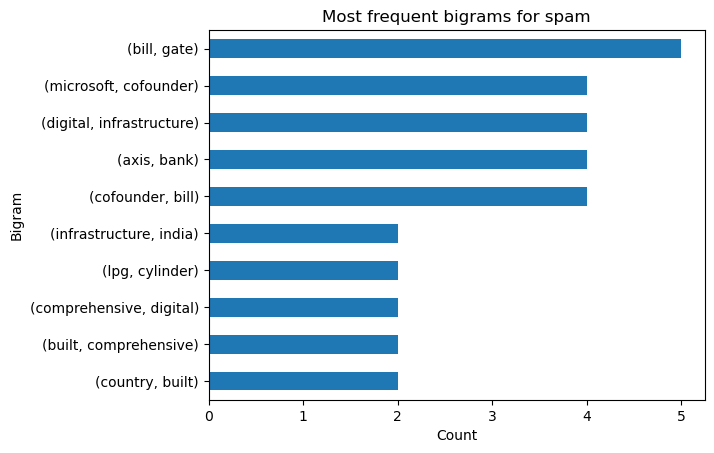

In [127]:
#Plot Bigrams
business_counts[:10].plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most frequent bigrams for spam')
plt.show()

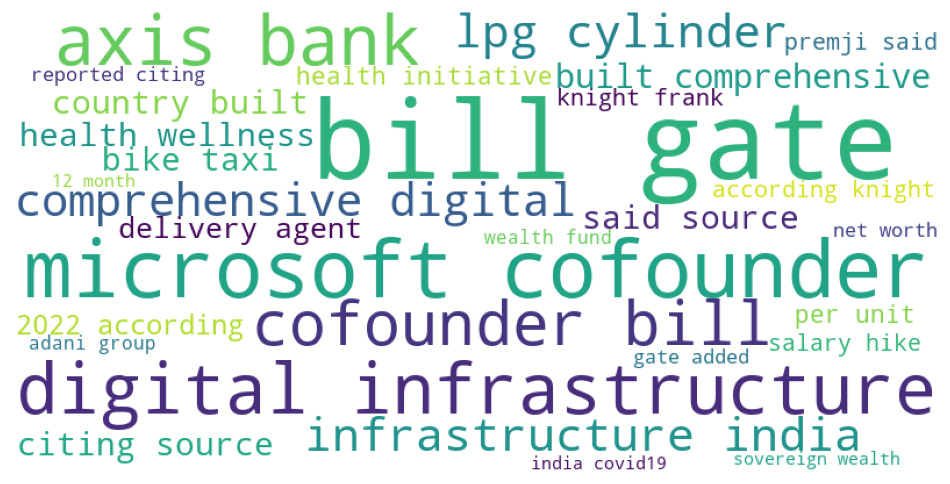

In [129]:
# Spam Wordcloud Trigram
data = {k[0] + ' ' + k[1]: v for k, v in business_counts.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()